#### Задание

- Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
- Для первой лабораторной работы рекомендуется использовать датасет без пропусков в данных, например из Scikit-learn.
- Пример преобразования датасетов Scikit-learn в Pandas Dataframe можно посмотреть здесь.
Для лабораторных работ не рекомендуется выбирать датасеты большого размера.

- Создать ноутбук, который содержит следующие разделы:
    1. Текстовое описание выбранного Вами набора данных.
    2. Основные характеристики датасета.
    3. Визуальное исследование датасета.
    4. Информация о корреляции признаков.
- Сформировать отчет и разместить его в своем репозитории на github.

# Описание набора данных 

Мы будем использовать набор данных по распознаванию вин https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
    
Эти данные являются результатами химического анализа вин, выращенных в одном регионе Италии тремя разными культиваторами. Было проведено тринадцать различных измерений для различных компонентов, содержащихся в трех типах вина. 

Каждый файл содержит следующие колонки:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality - целевой признак

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
# sns.set_context('talk')
sns.set(style="ticks")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("wine.csv")

In [31]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [17]:
data.shape

(1599, 12)

1599 строк, 7 колонок

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


Видим, что нет нулевых значений ни в одном столбце. Можем посмотреть типы данных.

Посмотрим основные статистические характеристики набора данных:

In [18]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [23]:
data['quality'].unique()

array(['bad', 'good'], dtype=object)

Целевой признак является бинарным и содержит значения 'bad' и 'good'. Удобнее было бы заменить их на 0 и 1.

In [4]:
data['quality'] = data['quality'].apply(lambda x: 1 if x == 'good' else 0)

In [42]:
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

# Визуальное исследование датасета

Графики про процент **алкоголя** в вине

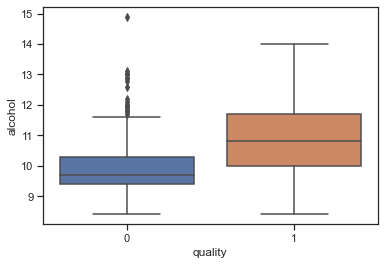

In [5]:
sns.boxplot(x='quality', y='alcohol', data=data)

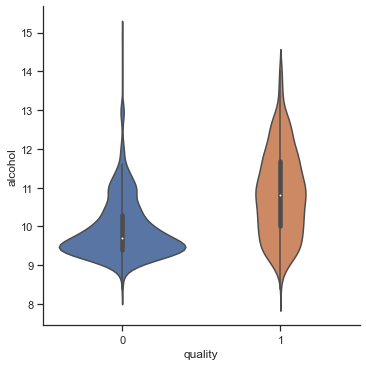

In [52]:
sns.catplot(x="quality", y="alcohol", data=data, kind="violin")

Видим различия в распределении процентности алкоголя среди качественных и некачественных вин. У качественных вин в среднем содержание алкоголя выше, при этом больше разброс. 

Также видим выбросы в категории некачественных вин с завышенным содержанием алкоголя. 

Рассмотрим графики про **фиксированную кислотность**

<AxesSubplot:xlabel='number of sample', ylabel='fixed acidity'>

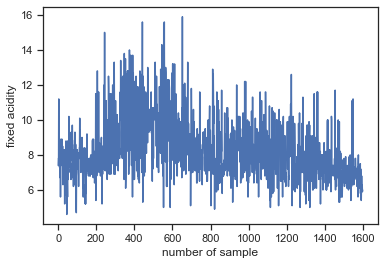

In [46]:
data['fixed acidity'].plot(xlabel = 'number of sample', ylabel = 'fixed acidity')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

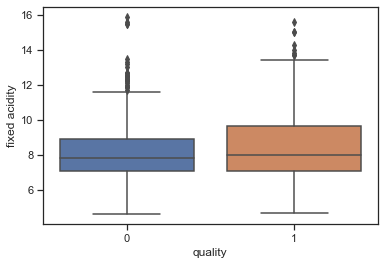

In [50]:
sns.boxplot(x='quality', y='fixed acidity', data=data)

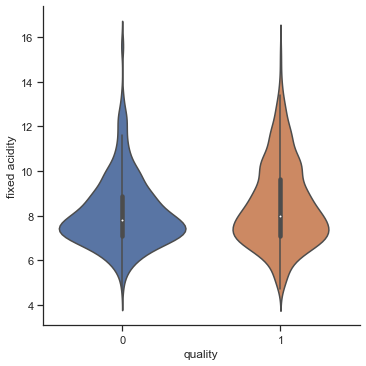

In [51]:
sns.catplot(x="quality", y="fixed acidity", data=data, kind="violin")

Эти графики показывают плотность распределения, заметны незначительные выбросы с большими значениями кислотности (нарушение нормального распределения)

Рассмотрим матрицу графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

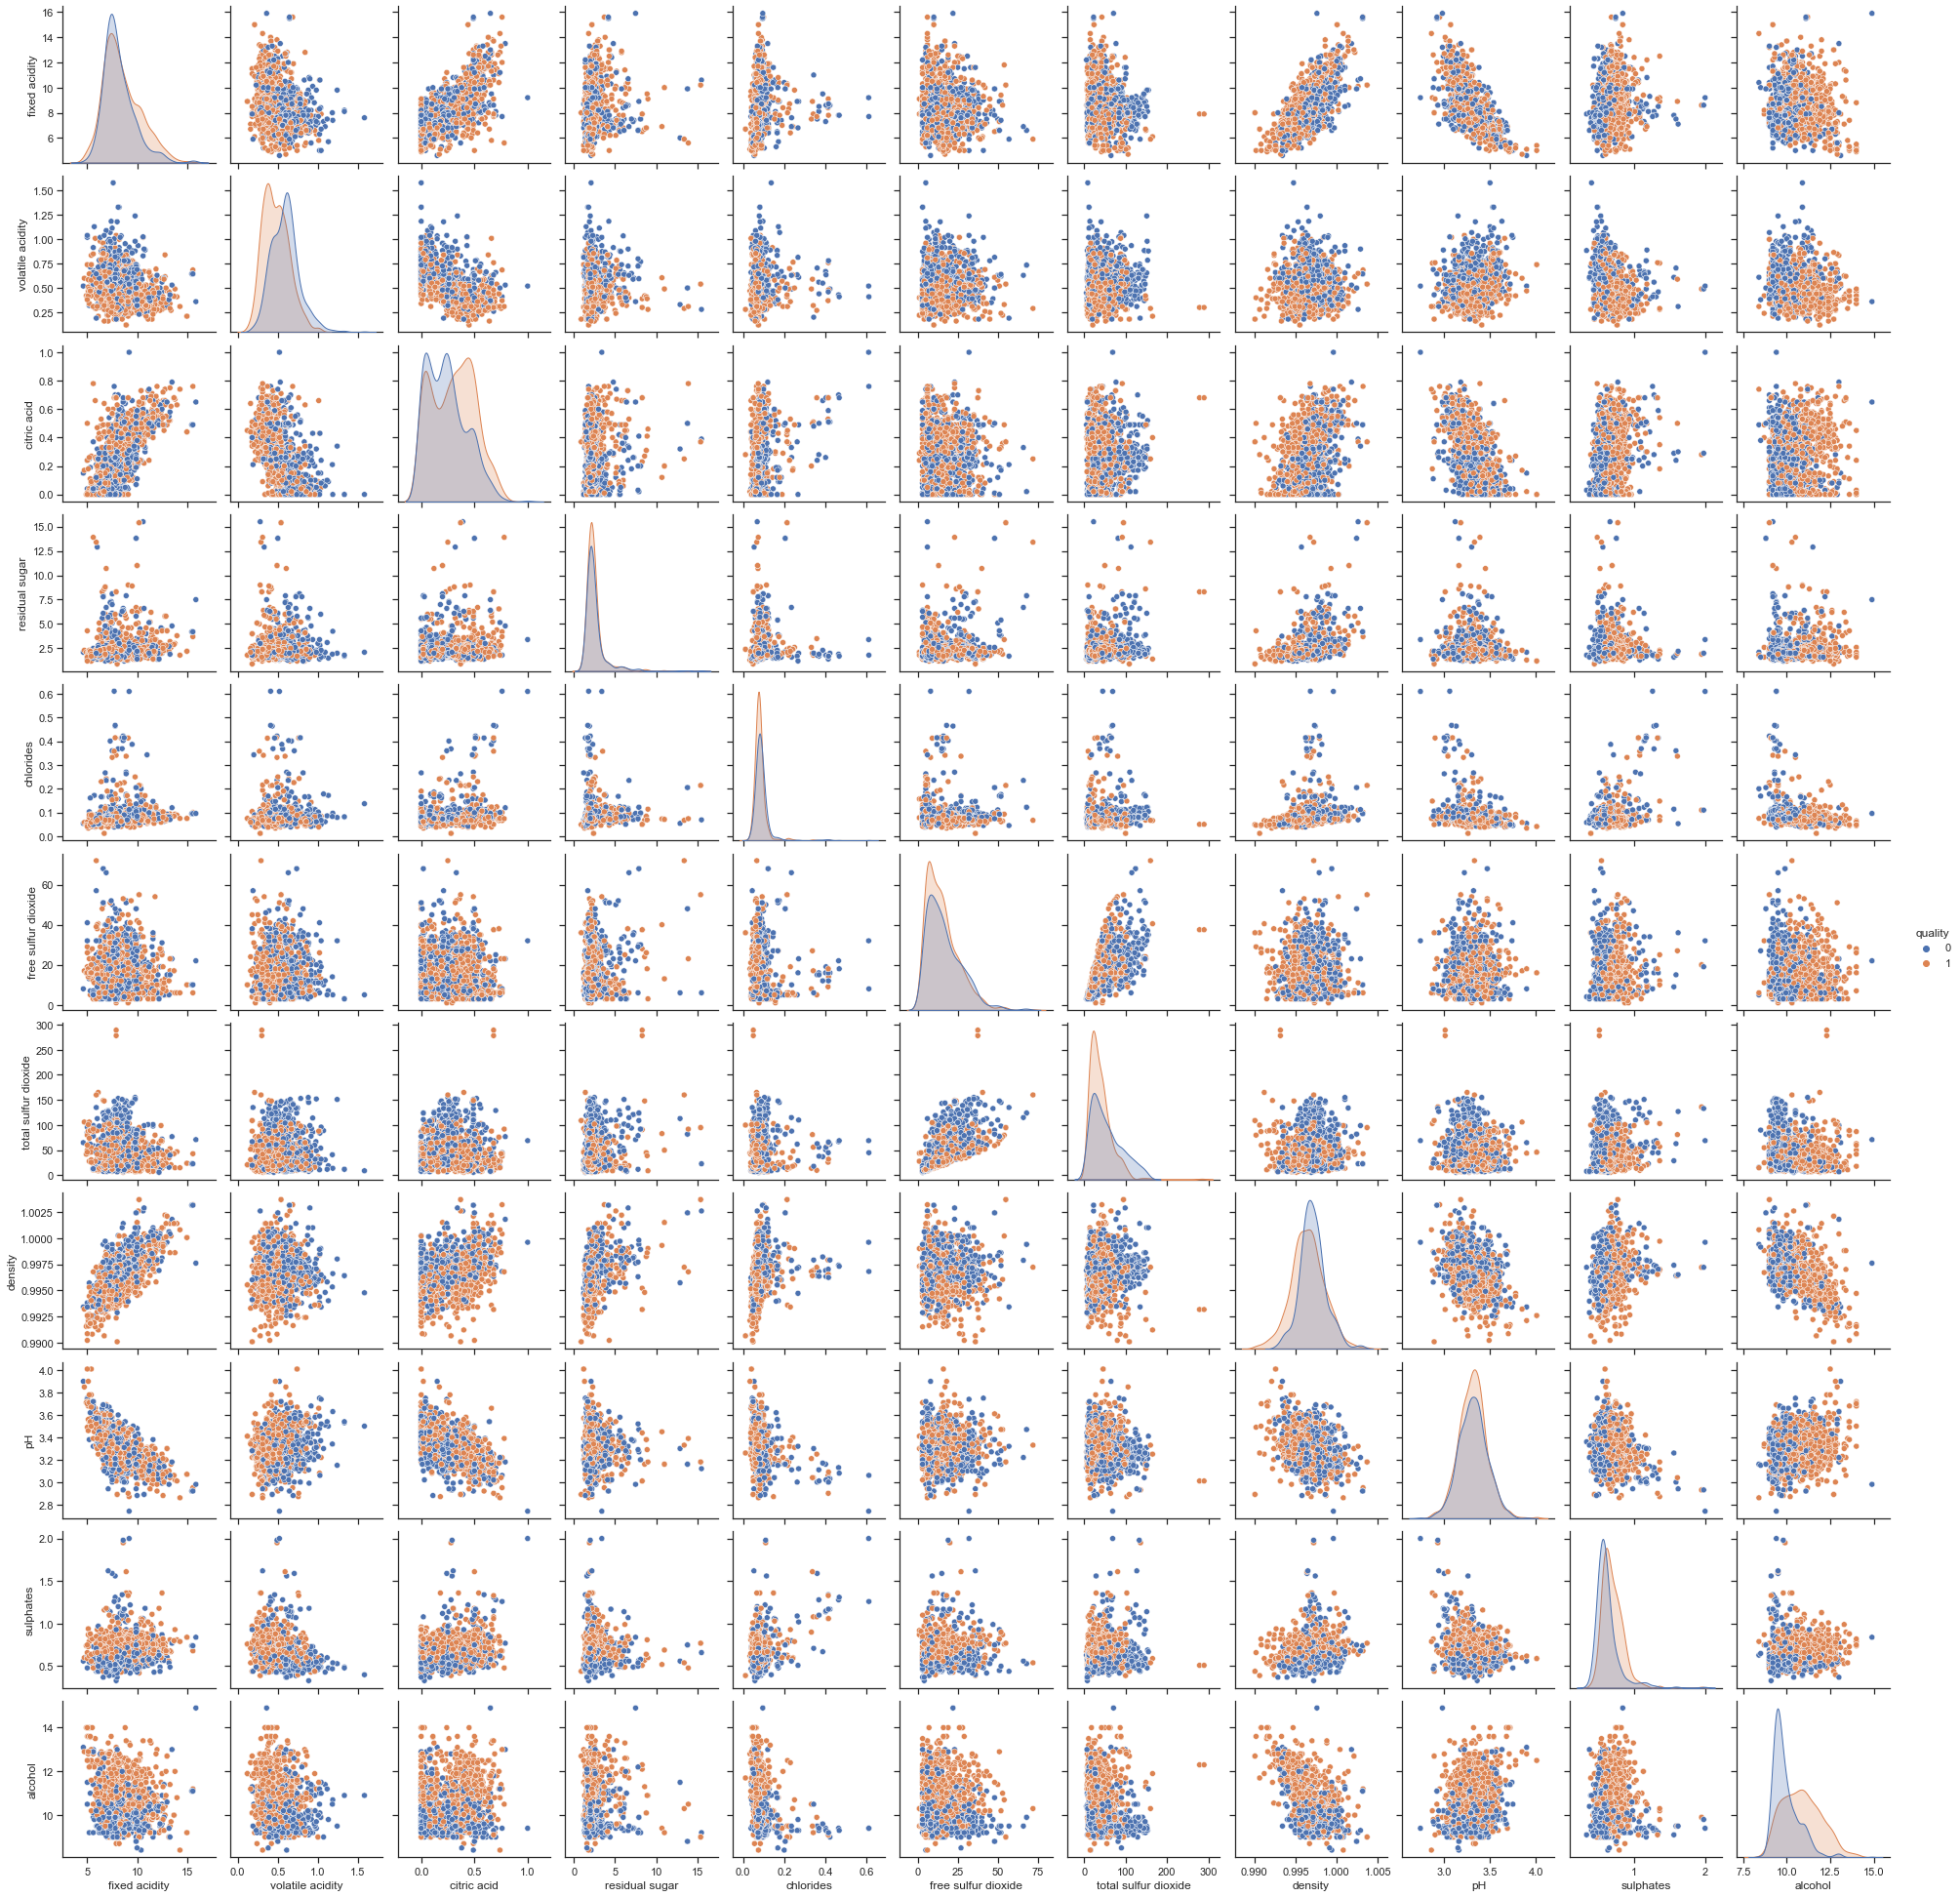

In [61]:
x

Можем заметить на некоторых графиках что-то похожее на линейность, впоследствии мы увидим это точнее с помощью коэффициентов корреляции.

Рассмотрим подробнее **связь некоторых пар величин**.

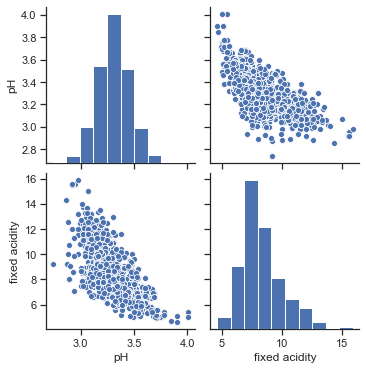

In [13]:
sns.pairplot(data[['pH', 'fixed acidity']])

pH влияет на восприятие кислотности, и возможно поэтому прослеживается какая-то линейная зависимость в измерениях.

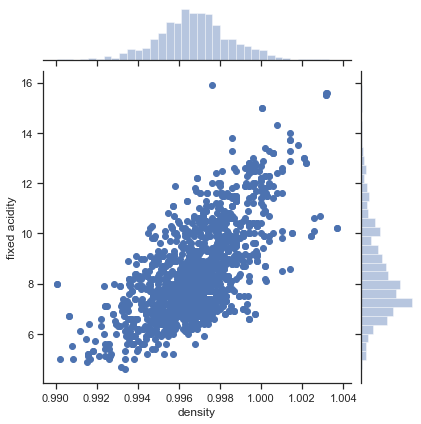

In [12]:
sns.jointplot(x = 'density', y = 'fixed acidity', data=data)

Прослеживается линейная зависимость фиксированной кислотности и плотности.

# Информация о корреляции признаков

In [62]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


<AxesSubplot:>

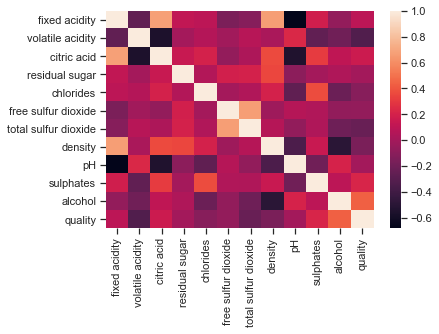

In [67]:
sns.heatmap(data.corr())

- Целевой признак наиболее коррелирует с алкогольностью (0,434), летучей кислотностью (-0,321), общим диоксидом серы (-0,232), сульфатами (0,218). Эти признаки оставим точно.
- Целевой признак мало коррелирует с остаточным сахаром (-0,002), pH (-0,003), со свободным диоксидом серы (-0,061), фиксированной кислотностью (0,095). Лучше эти признаки исключить.
- Значительно коррелируют между собой фиксированная кислотность и pH (-0,683). Исключим pH.
- Значительно коррелируют между собой фиксированная кислотность и плотность (-0,668). Исключим фиксированную кислотность.
- Коррелируют voltatile acicidity и citric acid (-0,552). Исключим второй признак как менее коррелирующий с качеством.
- Коррелируют citric acid и pH (-0,542). Исключим второй признак.
- Коррелируют density и alhocol (-0,496). Лучше исключить первый признак.

In [19]:
df = data.drop(["residual sugar", "pH", "free sulfur dioxide", "fixed acidity"], axis = 1)